In [70]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import random
from citipy import citipy
import time
from datetime import datetime

# Add api_key
from config import weather_api_key

# Create initial URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [61]:
#Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [62]:
#Add lats and longs to a list

coordinates = list(lat_lngs)

In [63]:
# Create a list for holding the cities
cities = []

#Identify neares city for each lat and long pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count,
len(cities)

599

In [64]:
# Initialize empty list to hold weather data
city_data = []

# Print beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create Counters.

record_count = 1
set_count = 1

# Loop through cities list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    print(city_url)
    #Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information to city_data list
        
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    
    # If an error is experienced, skip this city
    
    except:
        
        print("City not found. Skipping...")
    pass
    
# Indicate Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | liverpool
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=liverpool
Processing Record 2 of Set 1 | georgetown
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=georgetown
Processing Record 3 of Set 1 | kapaa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=kapaa
Processing Record 4 of Set 1 | basco
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=basco
Processing Record 5 of Set 1 | bandarbeyla
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=bandarbeyla
Processing Record 6 of Set 1 | busselton
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=busselton
Processing Record 7 

Processing Record 4 of Set 2 | barentsburg
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=barentsburg
City not found. Skipping...
Processing Record 5 of Set 2 | xiongyue
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=xiongyue
Processing Record 6 of Set 2 | alto araguaia
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=alto+araguaia
Processing Record 7 of Set 2 | englehart
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=englehart
Processing Record 8 of Set 2 | bluff
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=bluff
Processing Record 9 of Set 2 | cabra
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=cabra
Processing Record 10 of Set 2 | lardos
https://a

Processing Record 7 of Set 3 | saldanha
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=saldanha
Processing Record 8 of Set 3 | pombas
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=pombas
Processing Record 9 of Set 3 | provideniya
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=provideniya
Processing Record 10 of Set 3 | puerto ayora
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=puerto+ayora
Processing Record 11 of Set 3 | kodiak
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=kodiak
Processing Record 12 of Set 3 | amderma
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=amderma
City not found. Skipping...
Processing Record 13 of Set 3 | ferrol
https://

Processing Record 10 of Set 4 | kolyvan
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=kolyvan
Processing Record 11 of Set 4 | angoram
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=angoram
Processing Record 12 of Set 4 | ponta do sol
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=ponta+do+sol
Processing Record 13 of Set 4 | wewak
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=wewak
Processing Record 14 of Set 4 | kruisfontein
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=kruisfontein
Processing Record 15 of Set 4 | cherskiy
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=cherskiy
Processing Record 16 of Set 4 | bredasdorp
https://api.openweathermap.

Processing Record 13 of Set 5 | guerrero negro
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=guerrero+negro
Processing Record 14 of Set 5 | bud
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=bud
Processing Record 15 of Set 5 | riyadh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=riyadh
Processing Record 16 of Set 5 | catina
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=catina
Processing Record 17 of Set 5 | nantucket
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=nantucket
Processing Record 18 of Set 5 | mackay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=mackay
Processing Record 19 of Set 5 | pisco
https://api.openweathermap.org/data/2.5/weathe

Processing Record 16 of Set 6 | sitka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=sitka
Processing Record 17 of Set 6 | vredendal
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=vredendal
Processing Record 18 of Set 6 | puro
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=puro
Processing Record 19 of Set 6 | puri
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=puri
Processing Record 20 of Set 6 | nakusp
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=nakusp
Processing Record 21 of Set 6 | artyk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=artyk
City not found. Skipping...
Processing Record 22 of Set 6 | moerai
https://api.openweathermap.org/data/2.5

Processing Record 18 of Set 7 | bolungarvik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=bolungarvik
City not found. Skipping...
Processing Record 19 of Set 7 | vestmannaeyjar
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=vestmannaeyjar
Processing Record 20 of Set 7 | shache
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=shache
Processing Record 21 of Set 7 | mwanza
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=mwanza
Processing Record 22 of Set 7 | talnakh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=talnakh
Processing Record 23 of Set 7 | vladesti
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=vladesti
Processing Record 24 of Set 7 | tete
htt

Processing Record 21 of Set 8 | grindavik
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=grindavik
Processing Record 22 of Set 8 | kidal
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=kidal
Processing Record 23 of Set 8 | belmonte
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=belmonte
Processing Record 24 of Set 8 | iqaluit
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=iqaluit
Processing Record 25 of Set 8 | liepaja
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=liepaja
Processing Record 26 of Set 8 | lazaro cardenas
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=lazaro+cardenas
Processing Record 27 of Set 8 | darhan
https://api.openweathermap.org/

Processing Record 24 of Set 9 | umm lajj
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=umm+lajj
Processing Record 25 of Set 9 | sinnamary
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=sinnamary
Processing Record 26 of Set 9 | nuuk
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=nuuk
Processing Record 27 of Set 9 | bouca
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=bouca
Processing Record 28 of Set 9 | okakarara
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=okakarara
Processing Record 29 of Set 9 | acarau
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=acarau
Processing Record 30 of Set 9 | scarborough
https://api.openweathermap.org/data/2.5/weathe

Processing Record 28 of Set 10 | willowmore
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=willowmore
Processing Record 29 of Set 10 | nova odesa
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=nova+odesa
Processing Record 30 of Set 10 | itoman
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=itoman
Processing Record 31 of Set 10 | meulaboh
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=meulaboh
Processing Record 32 of Set 10 | whitehorse
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=whitehorse
Processing Record 33 of Set 10 | warkworth
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=warkworth
Processing Record 34 of Set 10 | voloshka
https://api.openwe

Processing Record 30 of Set 11 | port augusta
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=port+augusta
Processing Record 31 of Set 11 | khartoum
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=khartoum
Processing Record 32 of Set 11 | billings
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=billings
Processing Record 33 of Set 11 | marabba
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=marabba
Processing Record 34 of Set 11 | namtsy
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=namtsy
Processing Record 35 of Set 11 | polunochnoye
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=polunochnoye
Processing Record 36 of Set 11 | omboue
https://api.openweat

Processing Record 32 of Set 12 | bajil
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=bajil
Processing Record 33 of Set 12 | rio gallegos
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=rio+gallegos
Processing Record 34 of Set 12 | kamenka
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=kamenka
Processing Record 35 of Set 12 | yushala
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=yushala
Processing Record 36 of Set 12 | havelock
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=havelock
Processing Record 37 of Set 12 | byron bay
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1333a5c1f84f827dad10a504882ca1c2&q=byron+bay
Processing Record 38 of Set 12 | bontang
https://api.openweathermap.or

In [66]:
len(city_data)

552

In [67]:
# Create DataFrame

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Liverpool,53.4106,-2.9779,48.65,69,20,23.02,GB,2023-01-12 18:35:04
1,Georgetown,5.4112,100.3354,78.73,93,20,2.30,MY,2023-01-12 18:34:24
2,Kapaa,22.0752,-159.3190,66.18,83,40,5.75,US,2023-01-12 18:35:20
3,Basco,20.4487,121.9702,78.21,71,96,16.55,PH,2023-01-12 18:35:20
4,Bandarbeyla,9.4942,50.8122,75.88,68,11,20.04,SO,2023-01-12 18:35:24
5,Busselton,-33.6500,115.3333,60.84,93,4,7.76,AU,2023-01-12 18:35:30
6,Cidreira,-30.1811,-50.2056,79.59,67,15,11.32,BR,2023-01-12 18:35:32
7,Ushuaia,-54.8000,-68.3000,65.86,42,75,13.80,AR,2023-01-12 18:26:11
8,Carnarvon,-24.8667,113.6333,72.91,77,0,22.50,AU,2023-01-12 18:35:36
9,Tulagi,-9.0996,160.1476,81.61,75,95,7.27,SB,2023-01-12 18:35:36


In [68]:
#Re-order Columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Liverpool,GB,2023-01-12 18:35:04,53.4106,-2.9779,48.65,69,20,23.02
1,Georgetown,MY,2023-01-12 18:34:24,5.4112,100.3354,78.73,93,20,2.30
2,Kapaa,US,2023-01-12 18:35:20,22.0752,-159.3190,66.18,83,40,5.75
3,Basco,PH,2023-01-12 18:35:20,20.4487,121.9702,78.21,71,96,16.55
4,Bandarbeyla,SO,2023-01-12 18:35:24,9.4942,50.8122,75.88,68,11,20.04
5,Busselton,AU,2023-01-12 18:35:30,-33.6500,115.3333,60.84,93,4,7.76
6,Cidreira,BR,2023-01-12 18:35:32,-30.1811,-50.2056,79.59,67,15,11.32
7,Ushuaia,AR,2023-01-12 18:26:11,-54.8000,-68.3000,65.86,42,75,13.80
8,Carnarvon,AU,2023-01-12 18:35:36,-24.8667,113.6333,72.91,77,0,22.50
9,Tulagi,SB,2023-01-12 18:35:36,-9.0996,160.1476,81.61,75,95,7.27


In [69]:
# Create output file (CSV).

output_data_file = "weather_data/cities.csv"

#Export into CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

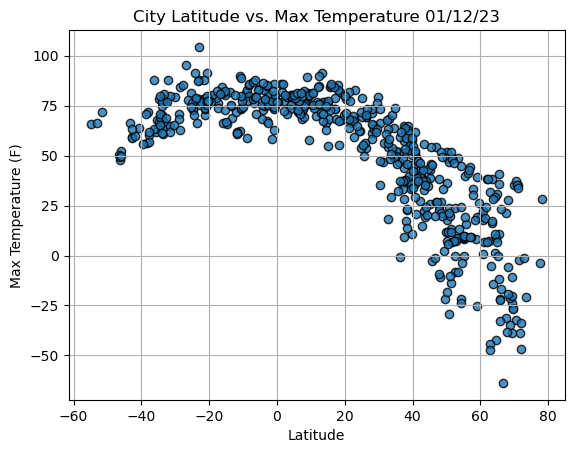

In [76]:
# Build scatter plot for latitude vs. max. temp

plt.scatter(lats,
           max_temps,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

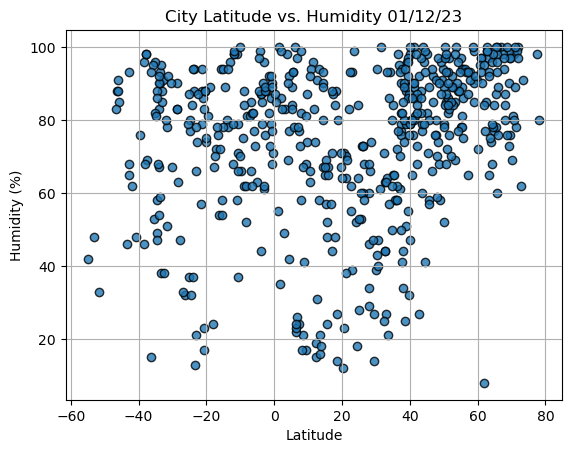

In [73]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

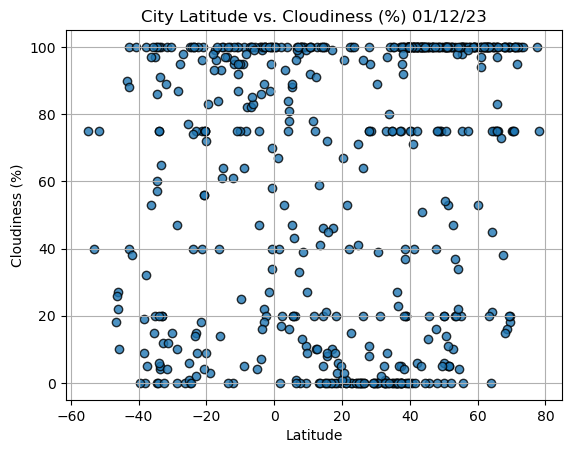

In [75]:
# Build scatter plot for latitude vs. cloudiness.

plt.scatter(lats,
           cloudiness,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

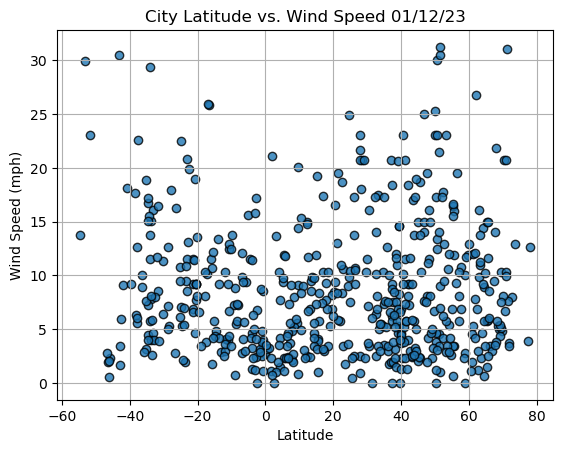

In [77]:
# Build scatter plot for latitude vs. wind speed

plt.scatter(lats,
           wind_speed,
           edgecolor= "black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save figure

plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()